In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
node_dist_to_color = {
    1: "tab:red",
    2: "tab:orange",
    3: "tab:olive",
    4: "tab:green",
    5: "tab:blue",
    6: "tab:purple"
}

# create a rainbow color mpaaing using matplotlib's tableau colors

In [32]:
nnodes = 13
G = nx.complete_graph(nnodes)

# A graph with (2n + 1) nodes requires n colors for the edges

n = (nnodes - 1) // 2

ndist_iter = list(range(1,n+1))
# create a list from 1 to 6
ndist_iter += ndist_iter[::-1]
# append 6 to 1


In [26]:
G.edges.data()

EdgeDataView([(0, 1, {}), (0, 2, {}), (0, 3, {}), (0, 4, {}), (0, 5, {}), (0, 6, {}), (0, 7, {}), (0, 8, {}), (0, 9, {}), (0, 10, {}), (0, 11, {}), (0, 12, {}), (1, 2, {}), (1, 3, {}), (1, 4, {}), (1, 5, {}), (1, 6, {}), (1, 7, {}), (1, 8, {}), (1, 9, {}), (1, 10, {}), (1, 11, {}), (1, 12, {}), (2, 3, {}), (2, 4, {}), (2, 5, {}), (2, 6, {}), (2, 7, {}), (2, 8, {}), (2, 9, {}), (2, 10, {}), (2, 11, {}), (2, 12, {}), (3, 4, {}), (3, 5, {}), (3, 6, {}), (3, 7, {}), (3, 8, {}), (3, 9, {}), (3, 10, {}), (3, 11, {}), (3, 12, {}), (4, 5, {}), (4, 6, {}), (4, 7, {}), (4, 8, {}), (4, 9, {}), (4, 10, {}), (4, 11, {}), (4, 12, {}), (5, 6, {}), (5, 7, {}), (5, 8, {}), (5, 9, {}), (5, 10, {}), (5, 11, {}), (5, 12, {}), (6, 7, {}), (6, 8, {}), (6, 9, {}), (6, 10, {}), (6, 11, {}), (6, 12, {}), (7, 8, {}), (7, 9, {}), (7, 10, {}), (7, 11, {}), (7, 12, {}), (8, 9, {}), (8, 10, {}), (8, 11, {}), (8, 12, {}), (9, 10, {}), (9, 11, {}), (9, 12, {}), (10, 11, {}), (10, 12, {}), (11, 12, {})])

In [20]:
nodes = list(G.nodes())
print(nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [35]:
def cycle(node_list, n):
    return node_list[-n:] + node_list[:-n]
    # use : to make sure node 0 is placed at position n

print(cycle(nodes,5))

[8, 9, 10, 11, 12, 0, 1, 2, 3, 4, 5, 6, 7]


In [36]:
for i,nd in enumerate(ndist_iter):
# loop through the node list
    for u,v in zip(nodes, cycle(nodes, i+1)):
    # the zip function combines each pair of elements in the lists into a tuple
    # i+1 jumps to the following position
        G[u][v]["color"] = node_dist_to_color[nd]
        # rotate nodes around the circle and assign colors for each edge based on node distance


{0: Text(1.0, -2.2924862849600895e-09, '0'),
 1: Text(0.8854560282263383, 0.4647231568574182, '1'),
 2: Text(0.5680647591429316, 0.8229838398102651, '2'),
 3: Text(0.12053670515150508, 0.9927088367776497, '3'),
 4: Text(-0.35460480922449533, 0.9350162507246034, '4'),
 5: Text(-0.7485106782612737, 0.6631226364666996, '5'),
 6: Text(-0.9709417964187541, 0.23931566593015044, '6'),
 7: Text(-0.9709417964187541, -0.2393156109104796, '7'),
 8: Text(-0.7485107974705606, -0.6631225814470286, '8'),
 9: Text(-0.35460498803842555, -0.9350161957049326, '9'),
 10: Text(0.12053676475614848, -0.9927088413626222, '10'),
 11: Text(0.5680645803290014, -0.8229839636045244, '11'),
 12: Text(0.8854560282263383, -0.46472319124471245, '12')}

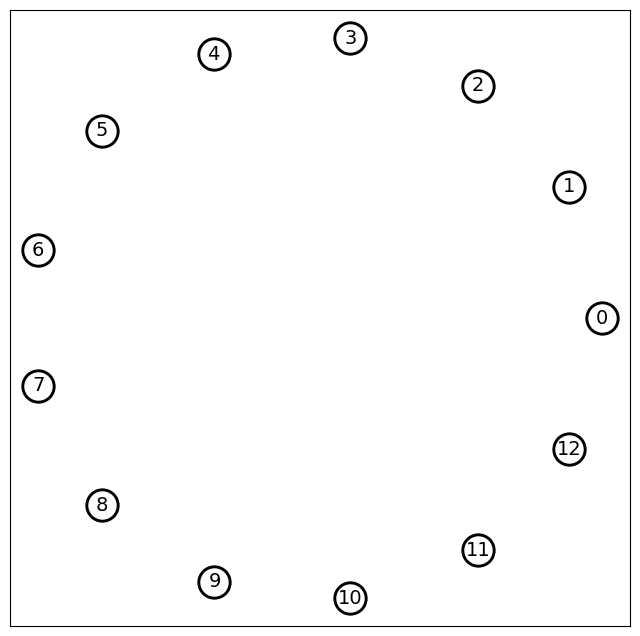

In [27]:
pos = nx.circular_layout(G)

fig, ax = plt.subplots(figsize=(8,8))
node_options = {"node_size":510, "node_color":"w", "edgecolors":"k", "linewidths":2.1}

nx.draw_networkx_nodes(G, pos, **node_options)
nx.draw_networkx_labels(G, pos, font_size=14)
# draw nodes and lables only

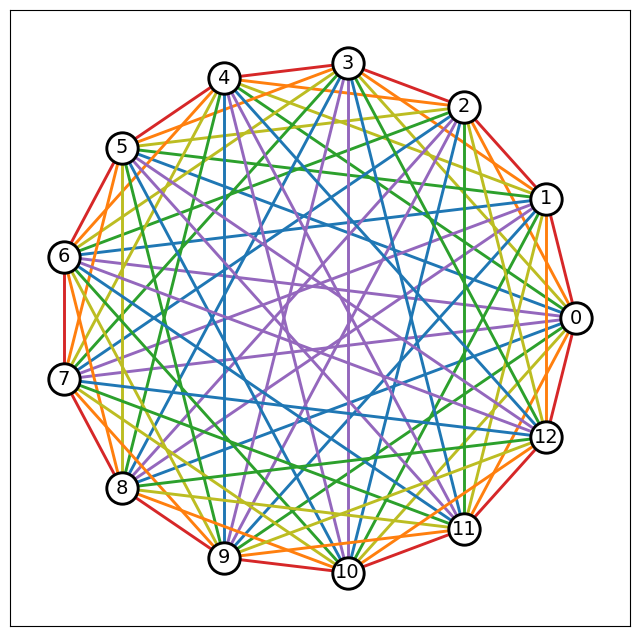

In [37]:
pos = nx.circular_layout(G)

fig, ax = plt.subplots(figsize=(8,8))
node_options = {"node_size":510, "node_color":"w", "edgecolors":"k", "linewidths":2.1}

nx.draw_networkx_nodes(G, pos, **node_options)
nx.draw_networkx_labels(G, pos, font_size=14)

edge_colors = [edgedata["color"] for _,_,edgedata in G.edges.data()]
# extract colors from edge data
# the underscores are anonymous variables corresponding to u,v above

nx.draw_networkx_edges(G, pos, width=2.1, edge_color=edge_colors)